In [1]:
import sys
from matplotlib import pyplot as plt

import torch
from torch import nn

/home/cstainsby/.local/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Pull in my modules

In [2]:
# import my modules 
from path import get_model_folder_path
sys.path.append(get_model_folder_path())

from basicModel import Transformer

from data_utils import generate_random_data, batchify_data
from model_utils import fit, predict

### Basic Model creation

In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model = Transformer(
    num_tokens=4, dim_model=8, num_heads=2, num_encoder_layers=3, num_decoder_layers=3, dropout_p=0.1
).to(device)
opt = torch.optim.SGD(model.parameters(), lr=0.01)
loss_fn = nn.CrossEntropyLoss()

### Create Random Data

In [4]:
train_data = generate_random_data(9000)
val_data = generate_random_data(3000)

train_dataloader = batchify_data(train_data)
val_dataloader = batchify_data(val_data)

562 batches of size 16
187 batches of size 16


### Training

In [5]:
EPOCHS = 10

train_loss_list, validation_loss_list = fit(
    model=model,
    opt= opt,
    loss_fn=loss_fn,
    train_dataloader=train_dataloader,
    val_dataloader=val_dataloader,
    epochs=EPOCHS
)

Training and validating model
------------------------- Epoch 1 -------------------------
Training loss: 0.5350
Validation loss: 0.3951
Epoch Step: 1 Tokens per Sec: 1.995810837825892

------------------------- Epoch 2 -------------------------
Training loss: 0.4027
Validation loss: 0.3518
Epoch Step: 2 Tokens per Sec: 1.934073826297258

------------------------- Epoch 3 -------------------------
Training loss: 0.3639
Validation loss: 0.2941
Epoch Step: 3 Tokens per Sec: 1.8354152219979947

------------------------- Epoch 4 -------------------------
Training loss: 0.3259
Validation loss: 0.2559
Epoch Step: 4 Tokens per Sec: 1.9094871820480013

------------------------- Epoch 5 -------------------------
Training loss: 0.2988
Validation loss: 0.2289
Epoch Step: 5 Tokens per Sec: 1.9172107200090893

------------------------- Epoch 6 -------------------------
Training loss: 0.2800
Validation loss: 0.2052
Epoch Step: 6 Tokens per Sec: 2.0122959028215246

------------------------- Epoch 7 --

### Visualization

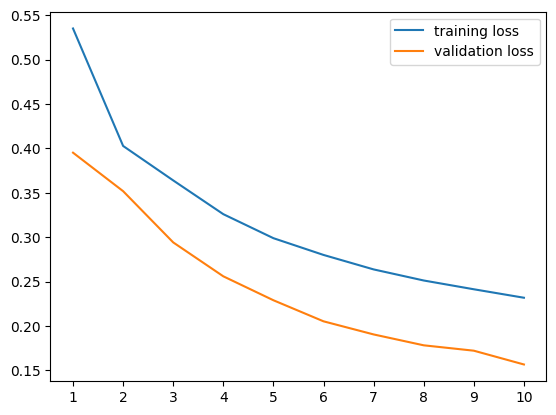

In [6]:
epoch_iters = [i+1 for i in range(EPOCHS)]

plot_axes = plt.axes()
plot_axes.set_xticks(epoch_iters)

plt.plot(epoch_iters, train_loss_list, label="training loss")
plt.plot(epoch_iters, validation_loss_list, label="validation loss")
plt.legend()
plt.show()

## Generate new data with predictions

In [7]:
# Here we test some examples to observe how the model predicts
examples = [
    torch.tensor([[2, 0, 0, 0, 0, 0, 0, 0, 0, 3]], dtype=torch.long, device=device),
    torch.tensor([[2, 1, 1, 1, 1, 1, 1, 1, 1, 3]], dtype=torch.long, device=device),
    torch.tensor([[2, 1, 0, 1, 0, 1, 0, 1, 0, 3]], dtype=torch.long, device=device),
    torch.tensor([[2, 0, 1, 0, 1, 0, 1, 0, 1, 3]], dtype=torch.long, device=device),
    torch.tensor([[2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 3]], dtype=torch.long, device=device),
    torch.tensor([[2, 0, 1, 3]], dtype=torch.long, device=device)
]

for idx, example in enumerate(examples):
    result = predict(model, example)
    print(f"Example {idx}")
    print(f"Input: {example.view(-1).tolist()[1:-1]}")
    print(f"Continuation: {result[1:-1]}")

    print("len of prediction:", len(result[1:-1]))
    print()

Example 0
Input: [0, 0, 0, 0, 0, 0, 0, 0]
Continuation: [0, 0, 0, 0, 0, 0, 0, 0, 0]
len of prediction: 9

Example 1
Input: [1, 1, 1, 1, 1, 1, 1, 1]
Continuation: [1, 1, 1, 1, 1, 1, 1, 1, 1]
len of prediction: 9

Example 2
Input: [1, 0, 1, 0, 1, 0, 1, 0]
Continuation: [0, 1, 0, 1, 0, 1, 0, 1]
len of prediction: 8

Example 3
Input: [0, 1, 0, 1, 0, 1, 0, 1]
Continuation: [0, 1, 0, 1, 0, 1, 0, 1]
len of prediction: 8

Example 4
Input: [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0]
Continuation: [0, 1, 0, 1, 0, 1, 0, 1]
len of prediction: 8

Example 5
Input: [0, 1]
Continuation: [1, 0, 1, 0, 1, 0, 1, 0, 1]
len of prediction: 9



## Actual Text Generation
Given our predictions above, let create a function which can 